<a href="https://colab.research.google.com/github/junsoo321/public-repository/blob/main/upscaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


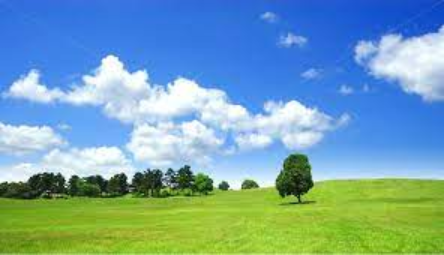

-1

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import glob

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def bl_resize(original_img,new_h,new_w):
  old_h,old_w,c=original_img.shape
  resized=np.zeros((new_h,new_w,c))
  w_scale_factor=(old_w )/(new_w )if new_h !=0 else 0
  h_scale_factor=(old_h )/(new_h )if new_w !=0 else 0
  for i in range(new_h):
    for j in range(new_w):
      x=i*h_scale_factor
      y=j*w_scale_factor
      x_floor=math.floor(x)
      x_ceil=min(old_h -1 , math.cell(x))
      y_floor=math.floor(y)
      y_ceil=min(old_w -1 , math.cell(y))

      if (x_cell == x_floor) and (y_ceil==y_floor):
        q=original_img[int(x),int(y),:]
      elif(x_ceil==x_floor):
        q1=original_img[int(x),int(y_floor),:]
        q2=original_img[int(x),int(y_ceil),:]
        q=q1*(y_ceil-y)+q2(y-y_floor)

      elif(y_ceil==y_floor):
        q1=original_img[int(x_floor),int(y),:]
        q2=original_img[int(x_ceil),int(y),:]
        q=q1*(x_ceil-x)+q2(x-x_floor)

      else:
        v1=original_img[x_floor,y_floor,:]
        v2=original_img[x_ceil,y_floor,:]
        v3=original_img[x_floor,y_ceil,:]
        v4=original_img[x_ceil,y_ceil,:]

        q1=v1*(x_ceil-x)+v2*(x-x_floor)
        q2=v3*(x_ceil-x)+v4*(x-x_floor)
        q=q1*(y_ceil-y)+q2*(y-y_floor)

      resized[i,j,:]=q
  return resized.astype(np.unit8)




img=cv2.imread('/content/drive/MyDrive/test.jpg',cv2.IMREAD_COLOR)
height, width=img.shape[:2]
dst=cv2.resize(img,(int(width*1.5),int(height*1.5)))

cv2_imshow(dst)
cv2.waitKey(0)